In [44]:
import pandas as pd   
filename = 'lunarCraterAges' 
df = pd.read_csv('lunarCraterAges.csv')
df = df.sort_values(by=['age'], ascending=False)
n_impacts = len(df)
print(n_impacts, 'impacts')
df.head()

111 impacts


,names,longitude,latitude,diameter,age
60,Mosting A,354.80469,-3.22070,12.7,1324
50,NaN,262.67029,43.65850,13.6,1026
45,NaN,79.73330,22.83180,14.3,993
2,King,120.49220,4.93750,76.2,992
41,Hume Z,90.41211,-3.62497,15.0,981


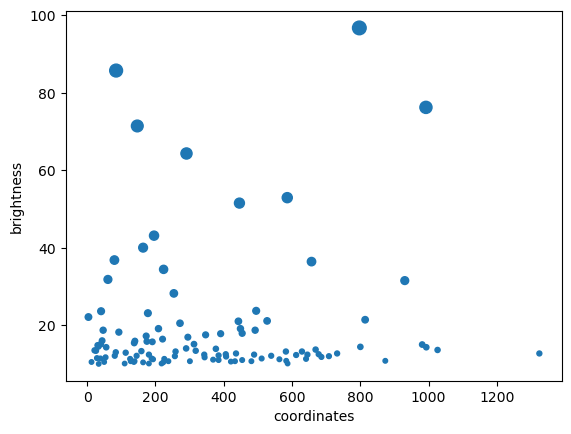

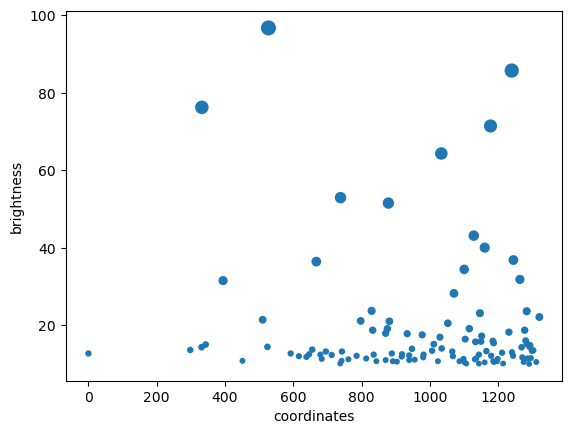

In [60]:
import matplotlib.pylab as plt  #import library for plotting, https://pypi.org/project/matplotlib/

ages = df['age'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
diameters = df['diameter'].values 

plt.scatter(ages, diameters, s=diameters)
plt.xlabel('coordinates')
plt.ylabel('brightness')
plt.show()

times_myrs = max(ages) - ages  

plt.scatter(times_myrs, diameters, s=diameters)
plt.xlabel('coordinates')
plt.ylabel('brightness')
plt.show()

In [46]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [47]:
myrs_per_beat = 25  #number of Myrs for each beat of music 

t_data = times_myrs/myrs_per_beat #rescale time from Myrs to beats


duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')

Duration: 52.8 beats


Duration: 52.8 seconds


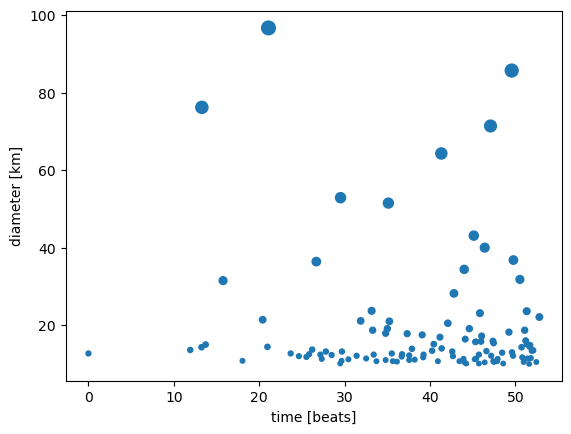

In [48]:
bpm = 60  #if bpm = 60, 1 beat = 1 sec 
duration_sec = duration_beats*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:', duration_sec, 'seconds')
plt.scatter(t_data, diameters, s=diameters)
plt.xlabel('time [beats]')
plt.ylabel('diameter [km]')
plt.show()

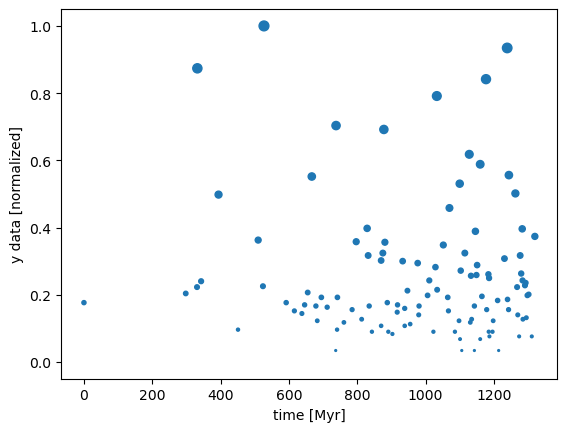

In [49]:
y_data = map_value(diameters, min(diameters), max(diameters), 0, 1) #normalize data, so it runs from 0 to 1 

y_scale = 0.5  #lower than 1 to spread out more evenly

y_data = y_data**y_scale

plt.scatter(times_myrs, y_data, s=50*y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()

In [50]:
!pip install audiolazy
!pip install mido

In [51]:
import mido

# Define a dictionary mapping note names to MIDI numbers
note_to_midi = {
    'C1': 24, 'C2': 36, 'C3': 48, 'C4': 60, 'C5': 72, 'C6': 84,
    'C#1': 25, 'C#2': 37, 'C#3': 49, 'C#4': 61, 'C#5': 73, 'C#6': 85,
    'D1': 26, 'D2': 38, 'D3': 50, 'D4': 62, 'D5': 74, 'D6': 86,
    'D#1': 27, 'D#2': 39, 'D#3': 51, 'D#4': 63, 'D#5': 75, 'D#6': 87,
    'E1': 28, 'E2': 40, 'E3': 52, 'E4': 64, 'E5': 76, 'E6': 88,
    'F1': 29, 'F2': 41, 'F3': 53, 'F4': 65, 'F5': 77, 'F6': 89,
    'F#1': 30, 'F#2': 42, 'F#3': 54, 'F#4': 66, 'F#5': 78, 'F#6': 90,
    'G1': 31, 'G2': 43, 'G3': 55, 'G4': 67, 'G5': 79, 'G6': 91,
    'G#1': 32, 'G#2': 44, 'G#3': 56, 'G#4': 68, 'G#5': 80, 'G#6': 92,
    'A1': 33, 'A2': 45, 'A3': 57, 'A4': 69, 'A5': 81, 'A6': 93,
    'A#1': 34, 'A#2': 46, 'A#3': 58, 'A#4': 70, 'A#5': 82, 'A#6': 94,
    'B1': 35, 'B2': 47, 'B3': 59, 'B4': 71, 'B5': 83, 'B6': 95,
    # Add mappings for other notes here...
}

# Your list of note names
note_names = ['C1','C2','G2',
              'C3','E3','G3','A3','B3',
              'D4','E4','G4','A4','B4',
              'D5','E5','G5','A5','B5',
              'D6','E6','F#6','G6','A6']

# Convert note names to MIDI numbers
note_midis = [note_to_midi[note] for note in note_names]

n_notes = len(note_midis)
print('Resolution:', n_notes, 'notes')


Resolution: 23 notes


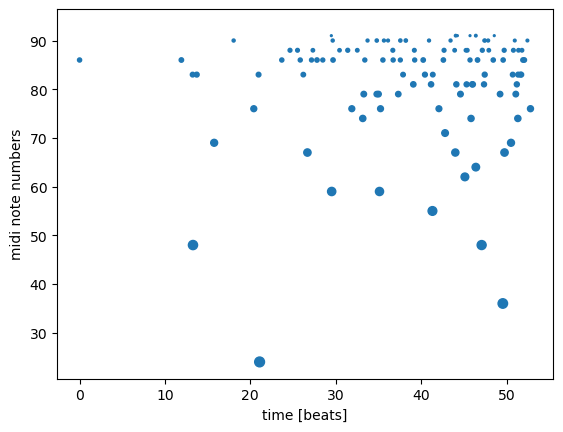

In [52]:
midi_data = []
for i in range(n_impacts):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

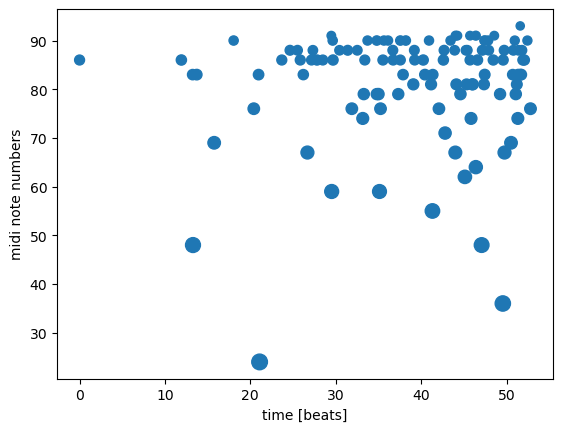

In [53]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity

vel_data = []
for i in range(n_impacts):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #bigger craters will be louder
                                                                #we round here because note velocites are integers
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [56]:
!pip install midiutil
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
    
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#add midi notes
for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

In [59]:
!pip install pygame
import pygame
pygame.init()
pygame.mixer.init()
pygame.mixer.music.stop()